In [2]:
import pandas as pd

In [3]:
import numpy as np

In [ ]:
data = pd.read_csv("C:/Users/Margarita/Desktop/ner_dataset_narrow.csv", engine='python', sep=";")

In [51]:
import numpy as np

data = pd.read_csv("C:/Users/Margarita/Desktop/ner_dataset.csv", encoding="latin1", sep=';')

In [52]:
data = data.fillna(method="ffill")

In [53]:
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [54]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
n_words = len(words); n_words

35092

In [55]:
words

['long-haul',
 'saluted',
 'grabs',
 'Hospitals',
 'responsible',
 'third-holiest',
 'five-match',
 'headliner',
 'provoke',
 'Mahlangu',
 '275-member',
 'rockers',
 'deterrent',
 'HIV-AIDS',
 'disrepute',
 'drawdown',
 'witch-hunting',
 'Cuban-born',
 'Saeb',
 'curbed',
 '7,2',
 'parishes',
 'Golovin',
 'ricocheted',
 'weakest',
 'half-English',
 '502nd',
 'sabotage',
 'experienced',
 'Tyson',
 'speeding',
 'duel',
 'craft',
 'al-Mashhadani',
 '..',
 'Molina',
 '626',
 'Esfandiari',
 'Nasiriyah',
 'Verbytsky',
 'methamphetamine',
 'TIME',
 'Teresa',
 'Rafiq',
 '64-year-old',
 'robots',
 'Cooder',
 'longer',
 'exactly',
 'exercising',
 'Valparaiso',
 'stumped',
 'depressing',
 'Hasbrouk',
 'persons',
 'DURING',
 'rye',
 'Anura',
 'rethink',
 'termination',
 'L.',
 'Madagascar',
 'al-Manar',
 'confine',
 'Sisli',
 'automobiles',
 'AC-130',
 'amendment',
 'Jong-Nam',
 'Boeing',
 'billionaires',
 'strategically',
 'technocrat',
 'Dale',
 'Tutsi',
 'aquatic',
 'Emily',
 'grueling',
 'siege

In [56]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); n_tags

15

So we have 47959 sentences containing 35178 different words with 17 different tags. We use the SentenceGetter class from last post to retrieve sentences with their labels.

In [57]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [58]:
getter = SentenceGetter(data)


In [59]:
sent = getter.get_next()

In [60]:
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [61]:
sentences = getter.sentences

### Prepare the data
Now we introduce dictionaries of words and tags.

In [62]:
max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [63]:
word2idx["Obama"]

1858

In [64]:
tag2idx["B-geo"]

5

Now we map the senctences to a sequence of numbers and then pad the sequence. Note that we increased the index of the words by one to use zero as a padding value. This is done because we want to use the mask_zeor parameter of the embedding layer to ignore inputs with value zero.

In [65]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [66]:
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words-1)

In [67]:
X

array([[10315, 12349,  1038, ..., 35091, 35091, 35091],
       [24485,  2902, 13478, ..., 35091, 35091, 35091],
       [ 4880, 32002, 12006, ..., 35091, 35091, 35091],
       ...,
       [30232, 25728,  5838, ..., 35091, 35091, 35091],
       [32312, 12350, 29829, ..., 35091, 35091, 35091],
       [ 2325,  7086,  1257, ..., 35091, 35091, 35091]])

And we need to do the same for our tag sequence.

In [68]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

In [69]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [70]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

For training the network we also need to change the labels y to categorial.

In [71]:
from keras.utils import to_categorical

In [72]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

We split in train and test set.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)

In [75]:
X_te

array([[ 8652, 31521,  7259, ..., 35091, 35091, 35091],
       [ 3600, 32686, 22654, ..., 35091, 35091, 35091],
       [ 8652, 13478,   571, ..., 35091, 35091, 35091],
       ...,
       [ 2325, 33195, 25451, ..., 35091, 35091, 35091],
       [10103, 34975,  3120, ..., 35091, 35091, 35091],
       [34418, 24343, 32789, ..., 35091, 35091, 35091]])

### Setup the CRF-LSTM
Now we can fit a LSTM-CRF network with an embedding layer.

In [76]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [77]:
from keras_contrib.layers import CRF

In [78]:
import keras
import keras_contrib

In [79]:
keras.__version__

'2.2.1'

In [80]:
keras_contrib.__version__

'0.0.2'

In [81]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words + 1, output_dim=20,
                  input_length=max_len, mask_zero=True)(input)  # 20-dim embedding
model = Bidirectional(LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags)  # CRF layer

In [82]:
out = crf(model)   # output

In [83]:
model = Model(input, out)

In [84]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

C:\ProgramData\Anaconda3\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
C:\ProgramData\Anaconda3\lib\site-packages\keras_contrib-2.0.8-py3.7.egg\keras_contrib\layers\crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy


In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 75, 20)            701860    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 75, 100)           28400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_2 (CRF)                  (None, 75, 15)            1020      
Total params: 736,330
Trainable params: 736,330
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=10,
                    validation_split=0.1, verbose=1)

Train on 38846 samples, validate on 4317 samples
Epoch 1/15
38846/38846 [==============================] - 215s 6ms/step - loss: 0.1080 - crf_viterbi_accuracy: 0.9697 - val_loss: 0.0422 - val_crf_viterbi_accuracy: 0.9851
Epoch 2/15
38846/38846 [==============================] - 183s 5ms/step - loss: 0.0321 - crf_viterbi_accuracy: 0.9881 - val_loss: 0.0285 - val_crf_viterbi_accuracy: 0.9886
Epoch 3/15
38846/38846 [==============================] - 187s 5ms/step - loss: 0.0239 - crf_viterbi_accuracy: 0.9904 - val_loss: 0.0249 - val_crf_viterbi_accuracy: 0.9896
Epoch 4/15
38846/38846 [==============================] - 155s 4ms/step - loss: 0.0207 - crf_viterbi_accuracy: 0.9913 - val_loss: 0.0236 - val_crf_viterbi_accuracy: 0.9901
Epoch 5/15
38846/38846 [==============================] - 144s 4ms/step - loss: 0.0190 - crf_viterbi_accuracy: 0.9918 - val_loss: 0.0224 - val_crf_viterbi_accuracy: 0.9904
Epoch 6/15
38846/38846 [==============================] - 167s 4ms/step - loss: 0.0178 - cr

In [87]:
hist = pd.DataFrame(history.history)

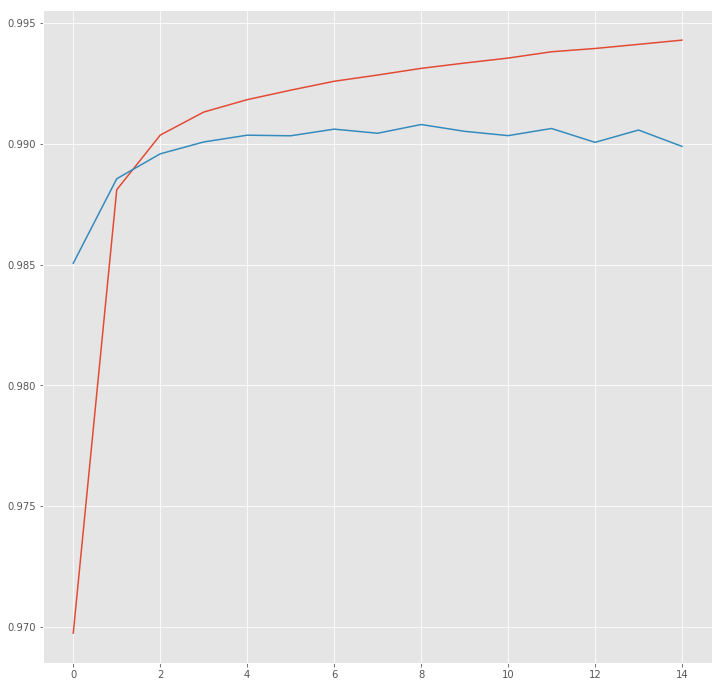

In [88]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["crf_viterbi_accuracy"])
plt.plot(hist["val_crf_viterbi_accuracy"])
plt.show()

### Evaluation
Now we can evaluate our model systematically. You can find the details in this post, here we just apply it.

In [89]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [93]:
test_pred = model.predict(X_te, verbose=1)

4796/4796 [==============================] - 4s 781us/step


In [94]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [95]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 82.4%


In [48]:
print(classification_report(test_labels, pred_labels))

           precision    recall  f1-score   support

      tim       0.88      0.85      0.87      2036
      per       0.76      0.79      0.77      1708
      geo       0.85      0.89      0.87      3811
      org       0.71      0.68      0.70      1970
      gpe       0.97      0.93      0.95      1622
      eve       0.39      0.32      0.35        28
      nat       0.45      0.26      0.33        19

micro avg       0.83      0.83      0.83     11194
macro avg       0.83      0.83      0.83     11194



In [50]:
i = 1900
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_te[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

Word           ||True ||Pred
Israeli        : B-gpe B-gpe
sources        : O     O
say            : O     O
troops         : O     O
were           : O     O
not            : O     O
involved       : O     O
in             : O     O
the            : O     O
shooting       : O     O
.              : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : O     O
exacerbating   : 